### PAR-2(GCN4) in cells with abolished cortical flows (Part 1)

Context:
- mlc-4 abolishes cortical flows, forcing embryos to rrely on PAR-2 to break symmetry (which wild type PAR-2 can do reasonably well)
- Testing whether PAR-2(GCN4) has impaired symmetry breaking in these conditions

Results:
- Whilst timings for wild type are a bit variable, most cells break symmetry eventually to form a strong domain
- Polarity is severely impaired for PAR-2(GCN4)


In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
sys.path.append('../../..')
from src import rotated_embryo, load_image, raw_data_path
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150

if not os.path.exists('Figs'):
    os.mkdir('Figs')

In [2]:
# Import embryos dataframe
df = pd.read_csv("../../../data/mlc4_embryos.csv")
if raw_data_path:
    df["Path"] = df["Path"].apply(lambda x: raw_data_path + x)

wt_paths = df[df.Line == "lp637"].Path.to_list()
gcn4_paths = df[df.Line == "nwg376"].Path.to_list()

### Timelapse figure

In [3]:
def single_panel(ax, img, roi, vmax, scale_bar=False):
    rotated = rotated_embryo(img, roi, 240, 170, 3)
    print(np.percentile(rotated, 99.9))
    ax.imshow(rotated, cmap="gray", vmin=0, vmax=vmax)
    ax.set_xticks([])
    ax.set_yticks([])

    if scale_bar:
        px = 0.255  # pixel size
        bar_length = 10  # microns
        bar_pixels = bar_length / px
        y = rotated.shape[0] - 10
        ax.plot(
            [rotated.shape[1] - 10 - bar_pixels, rotated.shape[1] - 10],
            [y, y],
            color="w",
            linewidth=1.5,
        )


def row(ax, path, vmax=29290.594246089513):
    roi = np.loadtxt(path + "/ROI_manual.txt")
    img = load_image(path + "/af_corrected.tif")

    # NEBD timepoint
    timepoint = int(np.loadtxt(path + "/NEBD.txt"))
    print(timepoint)

    # NEBD - 3
    single_panel(ax[0], img[timepoint - 6], roi, vmax, scale_bar=True)

    # NEBD
    single_panel(ax[1], img[timepoint], roi, vmax)

    # NEBD + 3
    single_panel(ax[2], img[timepoint + 6], roi, vmax)

7
12807.145479358876
22217.24263525296
29290.594246089513
18
22914.743717461493
16831.52708205619
21402.656444852713
16
9959.082905733621


10136.03182893881
10657.857719777912


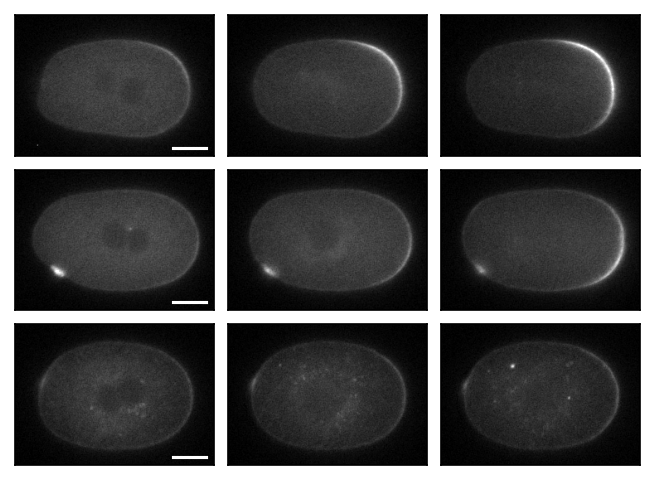

In [4]:
if raw_data_path:
    fig, ax = plt.subplots(3, 3)
    row(ax[0], wt_paths[0])
    row(ax[1], wt_paths[1])
    row(ax[2], gcn4_paths[0])
    fig.set_size_inches(5.5, 3)
    fig.subplots_adjust(wspace=0, top=1, bottom=0, hspace=0.1)
    fig.savefig("Figs/saibr_wt_gcn4.png", dpi=600, transparent=True)